# Laboratorio 02

**1.** Generar dos distribuciones de probabilidad centradas en 5.0, 7.5 con desviación estandar de 2.5 y 1.5 respectivamente. Realizar un gráfico de ambas distribuciones de probabilidad.

a). Emplear el objeto stats.norm y el metodo Probability density function (pdf)

b) Realizar un gráfico de ambas distribuciones

In [1]:
from scipy import stats
import matplotlib.pylab as plt
from scipy.stats import norm
import numpy as np
import pandas as pd

In [2]:
# Dos distribuciones de probabilidad 
f1 = stats.norm(loc=5.0, scale=2.5)  # media=5 y std=2.5
f2 = stats.norm(loc=7.5, scale=1.5)  # media=7.5 y std=1.5
x = np.linspace(-5, 20, 100)               # rango del dominio unidimensional x
# x1, x2 = frontera(7.5, 5, 1.5, 2.5)

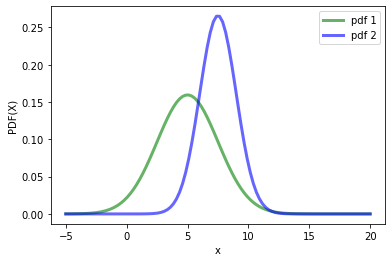

In [3]:
# Grafico de ambas distribuciones de probabilidad 

fig, ax = plt.subplots(1, 1)
ax.plot(x, f1.pdf(x), 'g-', lw=3, alpha=0.6, label='pdf 1')
ax.plot(x, f2.pdf(x), 'b-', lw=3, alpha=0.6, label='pdf 2')  
ax.set_xlabel("x")
ax.set_ylabel("PDF(X)")
plt.legend()
plt.show()

**2.**  ¿Qué frontera analítica puede separar los datos?. Determine una expresión analítica en este caso. 


Una función de distribución normal viene dada por:

$$f_1(x) = \frac{1}{\sigma_1 \sqrt{2\pi}} exp \left[ -\frac{(x-\mu_1)^2}{2\sigma_1^2} \right]$$

Donde $\mu_1$ representa la media de la función $f_1(x)$ y $\sigma_1$ su desviación estandar.
Por tanto, para dos conjuntos de datos o funciones normales con distintas media y desviación estandar, se puede definir una frontera analitica para diferenciar a qué conjunto pertenece un dato (de las dos distribuciones) como el valor de $x$ donde se intersecta las dos funciones (funciones unidimensionales).

Su intersección viene dada por:

$$f_1(x) = f_2(x) \quad \quad \Leftrightarrow \quad \quad $$

$$x_{\pm} = \frac{\sigma_2^2 \mu_1 - \sigma_1^2 \mu_2 \pm \sqrt{(\mu_2^2 + \mu_1^2)\sigma_1^2 \sigma_2^2 - 2\mu_2 \mu_1 \sigma_2^2 \sigma_1^2 + 2\sigma_1^2 \sigma_2^4 Ln(\sigma_2/\sigma_1) - 2\sigma_2^2 \sigma_1^4 Ln(\sigma_2/\sigma_1)} }{\sigma_2^2 - \sigma_1^2}$$

Si la función intersecta en dos puntos, se escoge como frontera uno de ellos para separar los valores a qué distribución pertenecen. Por otro lado, si las dos funciones no se intersectan entonces se puede escoger como frontera el punto medio que hay entre los dos extremos de las distribuciones. 

In [4]:
def frontera(mu1, mu2, s1, s2):
    
    '''
    Params: mui->Media de la funcion i
            si -> desviacion estandar de la funcion i
    Return: Dos puntos de intersección entre las dos funciones
    '''
    
    x1 = ((s2**2*mu1 - s1**2*mu2) + np.sqrt( (s2**2 + s1**2)*s1**2*s2**2 - 2*mu2*mu1*s2**2*s1**2 + 2*s1**2*s2**4*np.log(s2 / s1) - 2*s2**2*s1**4*np.log(s2 / s1))) / (s2**2 - s1**2)
    
    x2 = ((s2**2*mu1 - s1**2*mu2) - np.sqrt((s2**2 + s1**2)*s1**2*s2**2 - 2*mu2*mu1*s2**2*s1**2 + 2*s1**2*s2**4*np.log(s2 / s1) - 2*s2**2*s1**4*np.log(s2 / s1))) / (s2**2 - s1**2)
    
    return x1, x2

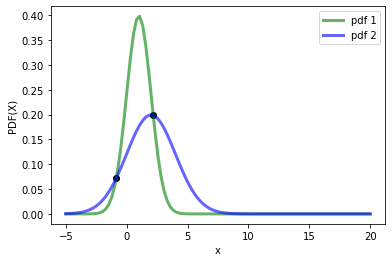

In [5]:
# Como ejemplo, grafiquemos los puntos de intersección de dos funciones

mu1, s1 = 1, 1
mu2, s2 = 2, 2
g1 = stats.norm(loc=mu1, scale=s1)  # media=1 y std=1
g2 = stats.norm(loc=mu2, scale=s2)  # media=2 y std=2
x1, x2 = frontera(mu1, mu2, s1, s2)
x = np.linspace(-5, 20, 100)   
fig, ax = plt.subplots(1, 1)

ax.plot(x1, g1.pdf(x1), 'ko')
ax.plot(x2, g2.pdf(x2), 'ko')

ax.plot(x, g1.pdf(x), 'g-', lw=3, alpha=0.6, label='pdf 1')
ax.plot(x, g2.pdf(x), 'b-', lw=3, alpha=0.6, label='pdf 2')  
ax.set_xlabel("x")
ax.set_ylabel("PDF(X)")
plt.legend()
plt.show()

### Modelo de *machine learning*

**3.** Empleando el metodo *Random variates*(rvs), genere 100 muestas aleatorias para cada distribución, estos seran los datos de entrenamiento

In [6]:
# Dos vectores con 100 muestras aleatorias para la distribución f1 y f2
random_1 = f1.rvs(100)
random_2 = f2.rvs(100)


**4.** Realice un gráfico en el que pueda superponer ambas distribuciones, estas 200 muestas serán las caracteristicas (*features*) de nuestro data frame, para cada característica tendremos una etiqueta(*labels*) correspondiente a  0 ó 1. 

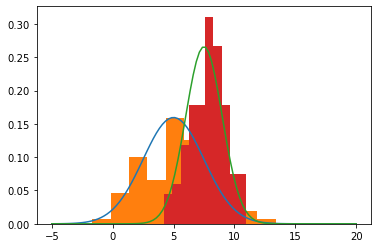

In [7]:
# Graficando las dos distribuciones aletorias y las dos distribuciones iniciales

plt.figure()
plt.plot(x, f1.pdf(x))
plt.hist(random_1, density=True)
plt.plot(x, f2.pdf(x))
plt.hist(random_2, density=True)
plt.show()

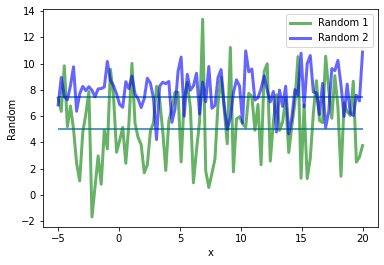

In [8]:
# Graficando el comportamiento de los dos vectores aleatorios

fig, ax = plt.subplots(1, 1)
ax.plot(x, random_1, 'g-', lw=3, alpha=0.6, label='Random 1')
ax.plot(x, random_2, 'b-', lw=3, alpha=0.6, label='Random 2')  
plt.hlines(5, -5, 20)
plt.hlines(7.5, -5, 20)
ax.set_xlabel("x")
ax.set_ylabel("Random")
plt.legend()
plt.show()

**5.** Con los datos anteriores construya un DataFrame con los *features* y *labels* de la siguiente forma:


 |Y(*labels*)         | X_1(*feature*)       |
 |----------|----------|
 |$Y^{1}$ | $X_1^{1}$|
 |$Y^{2}$ | $X_1^{2}$|
 |.         | .        |
 |.         | .        |
 |.         | .        |
 |$Y^{m}$ | $X_1^{m}$  |

- Se sugiere emplear las claves Y, X para los labels y features respectivamente.
- $Y^{1},Y^{2}... Y^{m} $ son los  label de entrenamiento.
- $X_1^{1},X_1^{2}... X_1^{m} $ es el conjunto de datos de entrenamiento asociado a la característica 1 en el entrenamiento m. 
- Este dataframe será el dataset de entrenamiento, para los datos de test construiremos 50 variables aleatorias. 

In [9]:
# Agregando una etiqueta para cada distribución, para la distr. random_1 con la etiqueta=0
# y para la distr. random_2 con la etiqueta=1

# features
X = np.zeros(200)
X[0:100] = random_1
X[100:200] = random_2

# labels 
Y = np.zeros(200)
Y[100:200] = np.ones(100)

In [10]:
# diccionario con los features y los labels
dicc = {'Y':Y, 'X':X}

In [11]:
# DataFrame con los features y los labels
df = pd.DataFrame(dicc)
df

,Y,X
0,0.0,7.382893
1,0.0,6.369647
2,0.0,9.839187
3,0.0,5.201650
4,0.0,6.776794
...,...,...
195,1.0,6.242771
196,1.0,6.049707
197,1.0,7.593795
198,1.0,7.161738


**6.** Construye un segundo data frame con 50 datos de test, asociados a las   muestras de  las dos distribuciones, estos serán los datos de test empleados para validar los algoritmos de clasificación df_test con claves  Y, X_1.

In [12]:
# Creando los datos de test de 50 variables aleatorias: 25 para cada distribución 

test1 = f1.rvs(25)
test2 = f2.rvs(25)
                    
# features para el data set               
X_1 = np.zeros(50)
X_1[0:25] = test1
X_1[25:50] = test2

# labels para el data test
Y1 = np.zeros(50)
Y1[25:50] = np.ones(25)

df_test = pd.DataFrame({'Y':Y1, 'X_1':X_1})

In [13]:
# DataFrame con los features y labels de los datos para el test 
df_test

,Y,X_1
0,0.0,2.425338
1,0.0,4.425692
2,0.0,4.259951
3,0.0,6.186495
4,0.0,5.798654
5,0.0,4.559158
6,0.0,7.723936
7,0.0,6.034223
8,0.0,2.354530
9,0.0,7.653771


### Modelo de machining learning 
**7.** Por ahora, emplearemos  clasificadores bajo un modelo de caja negra. La forma para implementar el modelo es la siguiente:
  - Definir el modelo y realizar el fit:
  ```
    clf = LinearRegression()
    clf.fit(X_train, Y_train)
  ```
  - Determinar el score de los datos de entrenamiento 
 
  ```
  score = clf.score(X_train, Y_train)
  ```
  - Determinar el score para los datos de test, ¿que puede concluir mirando los scores?

  Nota: 
  Emplear los siguientes clasificadores de machine learning y determinar los score para cada modelo. 
  
  ```
    - DecisionTreeClassifier(max_depth=3),
    - SVC(kernel="linear", C=0.025)
  ```


In [14]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()

In [15]:
x = np.array([1, 2, 3])
x.reshape(-1,)

array([1, 2, 3])

In [16]:
X_train = np.array(df['X']).reshape(-1, 1)
Y_train = np.array(df['Y']).reshape(-1,)
clf.fit(X_train, Y_train)

LinearRegression()

In [17]:
score = clf.score(X_train, Y_train)
score

0.23141118674572025

In [18]:
X_test = np.array(df_test['X_1']).reshape(-1, 1)
Y_test = np.array(df_test['Y']).reshape(-1,)

In [19]:
clf.score(X_test, Y_test)

0.2873856138587345

Con los scores obtenidos para los datos de entrenamiento y de test (menores al 30%) se puede concluir que NO es posible una buena predicción con el modelo usado para determinar si cierto valor pertenece al conjunto 1 o 2.     

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
clf1 = DecisionTreeClassifier(max_depth=3)
clf1.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3)

In [22]:
clf1.score(X_train, Y_train)

0.775

In [23]:
clf1.score(X_test, Y_test)

0.7

Con el modelo `DecisionTreeClassifier` se observa que hay una gran mejora para los scores de cada dataframe, pero que aún NO es posible tener una buena exactitud a la hora de predecir (scores $\sim$ 80%)

In [24]:
from sklearn.svm import SVC

In [25]:
clf2 = SVC(kernel="linear", C=0.025)

In [26]:
clf2.fit(X_train, Y_train)

SVC(C=0.025, kernel='linear')

In [27]:
clf2.score(X_train, Y_train)

0.73

In [28]:
clf2.score(X_test, Y_test)

0.78

Ninguno de los tres modelos usados son confiables para la predicción en la clasificación de un valor, pues ningun score supera el 0.80 y no llega a un 0.99 que es un valor en el cual si se puede confiar los resultados de las predicciones hechas. 

**8.** Existen librerias que pueden optmizar los hyperparametros de cualquier modelo:   [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) prueba a implementar las siguientes lineas de código con el siguiente modelo:

```
from sklearn.model_selection import GridSearchCV

  param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

  CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
  CV_rfc.fit(x_train, y_train)
```


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier


param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc = RandomForestClassifier()


CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
CV_rfc.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [30]:
CV_rfc.score(X_train, Y_train)

0.785

In [32]:
CV_rfc.score(X_test, Y_test)

0.74

**9.** En los algoritmos de *machining learning* es de suma importancia conocer las curvas de aprendizaje para decidir si el algoritmo funciona de manera optima, emplea las siguiente lineas de código para mostrar las curvas de aprendizaje de la regresion lineal. 

```
title = "Learning Curves (RandomForestRegressor)"
plot_learning_curve(
    regr, title, Xtr_, ytr_,  ylim=(0.8, 1.01),  n_jobs=4
)
```

In [33]:
from sklearn.model_selection import learning_curve

In [34]:
def plot_learning_curve(
    estimator,
    title,
    X,
    y,
    axes=None,
    ylim=None,
    cv=None,
    n_jobs=None,
    train_sizes=np.linspace(0.1, 1.0, 5),
):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = learning_curve(
        estimator,
        X,
        y,
        cv=cv,
        n_jobs=n_jobs,
        train_sizes=train_sizes,
        return_times=True,
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    axes[0].fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    axes[0].plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes[0].plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, "o-")
    axes[1].fill_between(
        train_sizes,
        fit_times_mean - fit_times_std,
        fit_times_mean + fit_times_std,
        alpha=0.1,
    )
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    fit_time_argsort = fit_times_mean.argsort()
    fit_time_sorted = fit_times_mean[fit_time_argsort]
    test_scores_mean_sorted = test_scores_mean[fit_time_argsort]
    test_scores_std_sorted = test_scores_std[fit_time_argsort]
    axes[2].grid()
    axes[2].plot(fit_time_sorted, test_scores_mean_sorted, "o-")
    axes[2].fill_between(
        fit_time_sorted,
        test_scores_mean_sorted - test_scores_std_sorted,
        test_scores_mean_sorted + test_scores_std_sorted,
        alpha=0.1,
    )
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

<module 'matplotlib.pylab' from '/home/alan/anaconda3/lib/python3.9/site-packages/matplotlib/pylab.py'>

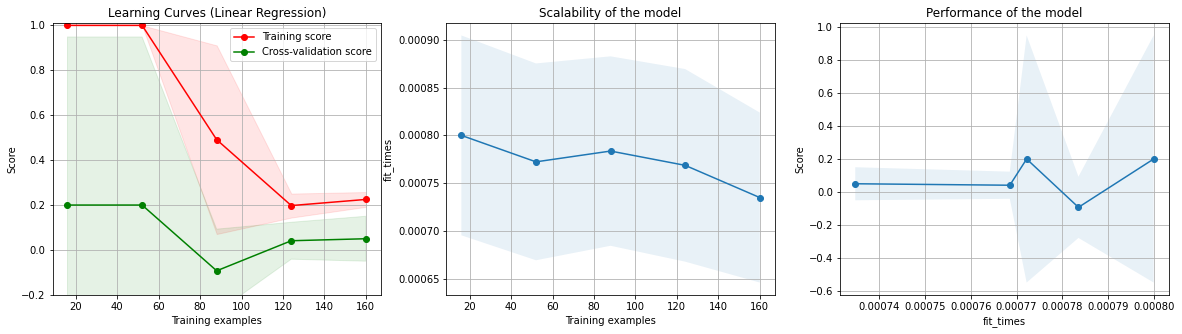

In [37]:
title = "Learning Curves (Linear Regression)"
regr = LinearRegression()
plot_learning_curve(regr, title, X_train, Y_train,  ylim=(-0.2, 1.01),  n_jobs=4)

Se observa a partir de la primera grafica que a medida que se aumenta los datos de entrenamiento (en el modelo de regresion lineal) disminuye el score, lo que implica una muy mala regresión para predecir con datos de testeo. 

**10.** Pruea a construir curvas de aprendizaje para los siguientes valores en las distribuciones(emplea una regresion lineal):
  - Datos de entrenamiento 30. media1=7.5, media2=10, desv1=1, desv1=1
  - Datos de entrenamiento 100. media1=7.5, media2=10, desv1=1, desv1=1
  - Datos de entrenamiento 200. media1=7.5, media2=7.0, desv1 = 2, desv1 = 2  
  - Datos de entrenamiento 200. media1=7.5, media2=7.0, desv1 = 0.5, desv1 = 0.5  
  -¿Qué puede concluir? de cada prueba.


Nota: Busca siempre la manera de construir tus codigos de forma estructurada  de tal forma que puedar variar parametros con facilidad.

In [39]:

def learning_curves(m, media1, media2, desv1, desv2):
    
    # m: número de datos de entrenamiento
    
    title = "Learning Curves (Linear Regression)"
    regr = LinearRegression()
    f1 = stats.norm(loc=media1, scale=desv1)  
    f2 = stats.norm(loc=media2, scale=desv2) 
    random_1 = f1.rvs(int(m / 2))
    random_2 = f2.rvs(int(m / 2))
    X = np.zeros(m)
    X[0:int(m / 2)] = random_1
    X[int(m / 2):m] = random_2
    Y = np.zeros(m)
    Y[int(m / 2):m] = np.ones(int(m / 2))
    X = X.reshape(-1, 1)
    Y = Y.reshape(-1,)
    
    plot_learning_curve(regr, title, X, Y,  ylim=(-0.2, 1.01),  n_jobs=4)
    
    

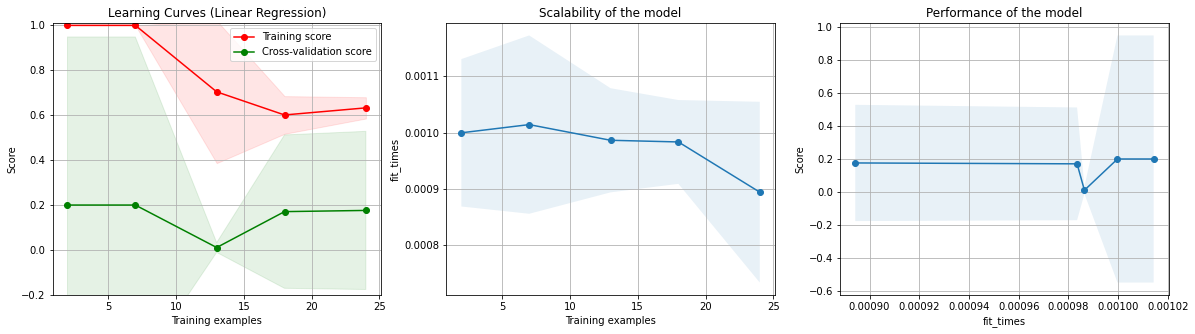

In [40]:
learning_curves(30, media1=7.5, media2=10, desv1=1, desv2=1)

Con 30 datos de entrenamiento se observa que el training score mantiene por encima de 0.6, mientras que el valifdation score no supera el 0.2. Por tanto, con estos valores aun no hay una buena predicción para los datos de testeo. 

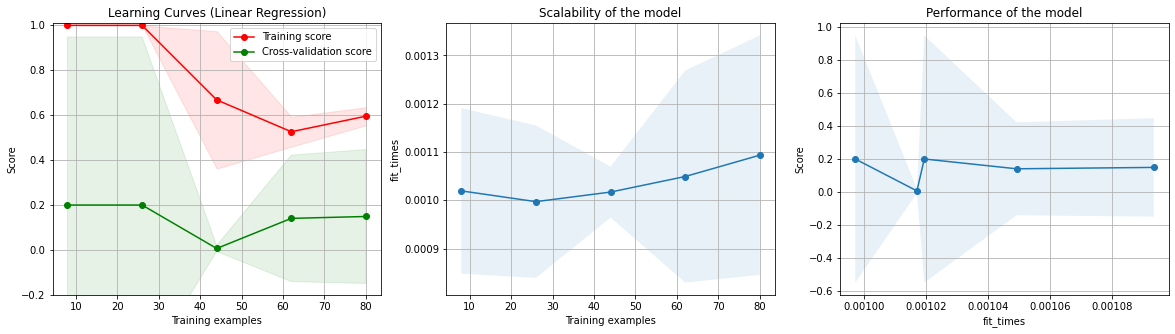

In [41]:
learning_curves(100, media1=7.5, media2=10, desv1=1, desv2=1)

Ahora con las mismas dos distribuciones que en la grafica pasada y con 100 datos de entrenamiento, se observa que el training score aumenta pero no alcanza un valor confiable para las predicciones. 

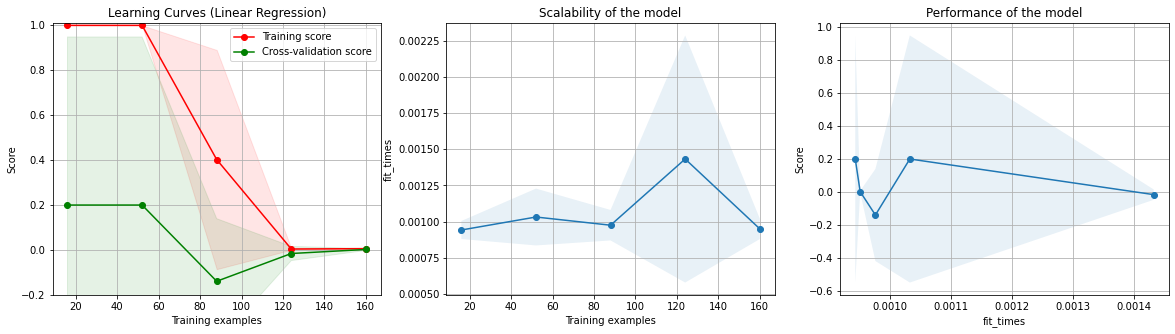

In [42]:
learning_curves(200, media1=7.5, media2=7, desv1=2, desv2=2)

Ahora para otras dos distribuciones con sus medias mas cercanas (7 y 7.5) con desviaciones iguales a 2, se observa que con 200 datos de entrenamiento el training score baja e iguala al cross-validation score por los valores de 0 lo cual significa una muy mala regresión para la predición con datos de testeo. 

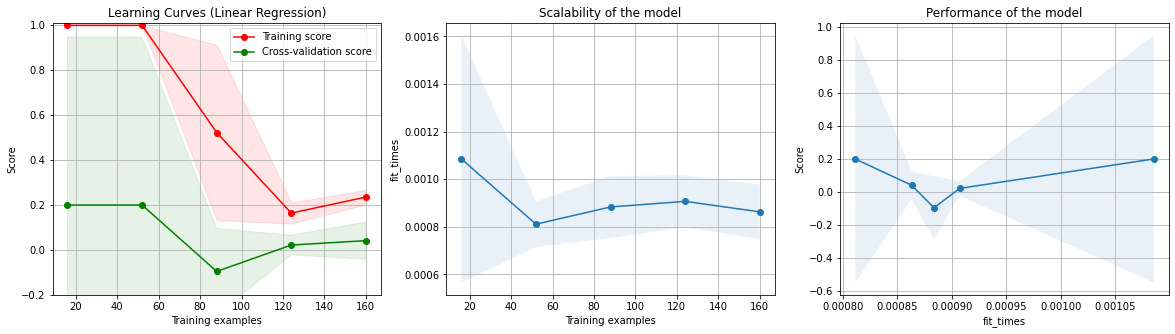

In [43]:
learning_curves(200, media1=7.5, media2=7, desv1=0.5, desv2=0.5)

Ahora la mismas dos distribuciones pero con una menor desviacion estandar de 0.5 se observa que el training score no llega a tener valores tan bajos como el de la grafica pasada, pues ya que la desviacion es pequeña existe una mayor facilidad para distinguir entre las dos distribuciones.